In [58]:
import numpy as np
import matplotlib.pyplot as plt # visulization data
%matplotlib inline
import seaborn as sns


In [59]:
import pandas as pd
df = pd.read_csv(r'c:\Users\Payal\Downloads\archive (1)\KaggleV2-May-2016.csv') # to avoid encoding error,



In [60]:
df.shape #to check the shape of the data

(110527, 14)

In [61]:
df.head() #to cheak the first 5 rows of the data
df.info() #to check the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [62]:
pd.isnull(df).sum() #to check the null values in the data

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [63]:
# All unrelated columns have already been removed from df, so nothing to drop here.

In [64]:
pd.isnull(df)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
df.dropna(axis=0, how='any', inplace=True) #to drop the null values from the data
# List of columns
df.columns

# Unique values in some important categorical features
print("Unique values in 'Gender':", df['Gender'].unique())
print("Unique values in 'No_show':", df['No_show'].unique())

# Check if 'ScheduledDay' and 'AppointmentDay' exist before converting
if 'ScheduledDay' in df.columns and 'AppointmentDay' in df.columns:
	df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
	df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Rename 'No-show' to 'No_show' to avoid confusion with Python's syntax
df.rename(columns={'No-show': 'No_show'}, inplace=True)


Unique values in 'Gender': ['F' 'M']


KeyError: 'No_show'

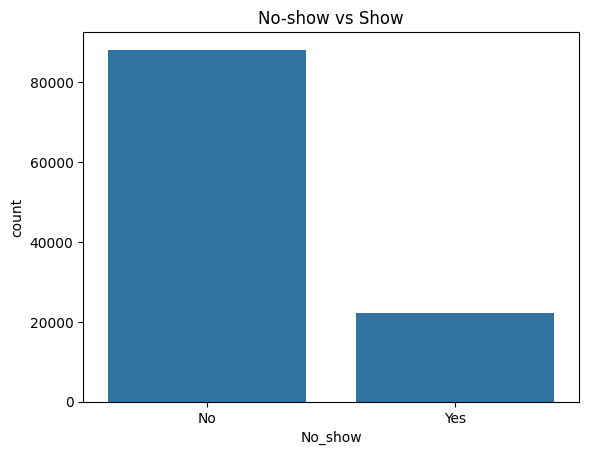

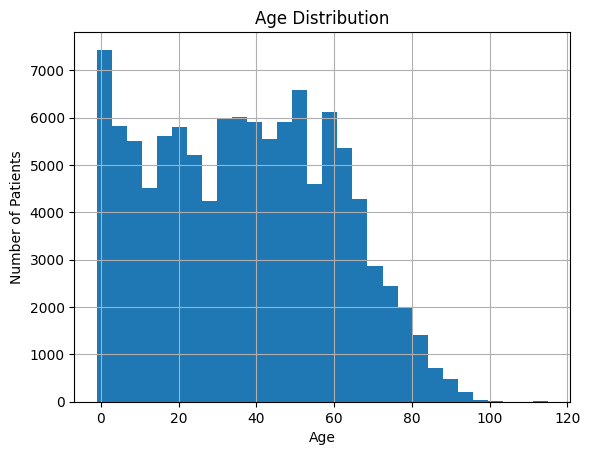

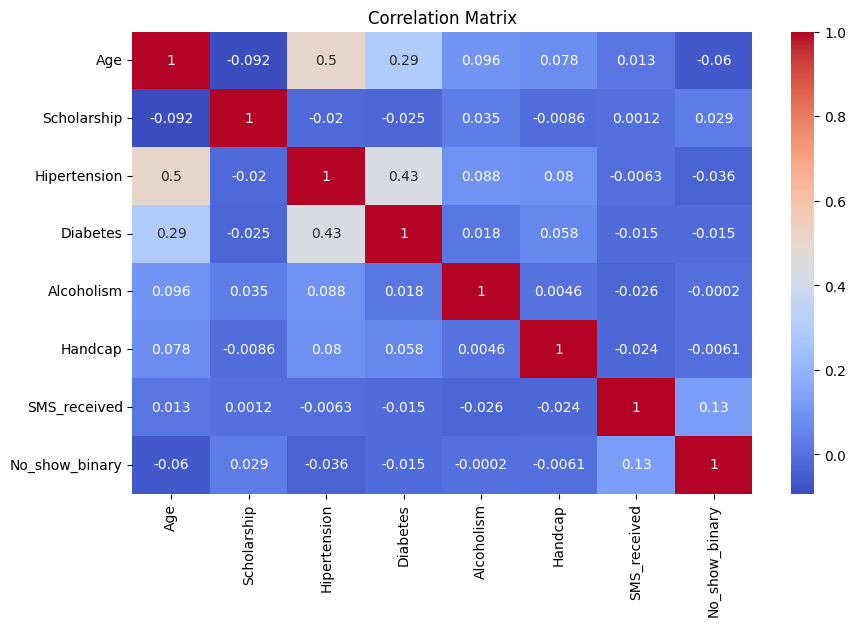

In [ ]:
import seaborn as sns # Import seaborn objects
sns.countplot(x='No_show', data=df)
plt.title('No-show vs Show')
plt.show()
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()
# Convert No_show to 0 and 1 for correlation
df['No_show_binary'] = df['No_show'].map({'No': 0, 'Yes': 1})

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

